<a href="https://colab.research.google.com/github/csaatechnicalarts/ML_Bootcamp/blob/main/Pandas_01_BasicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01 Basic Data Analysis with Python Pandas

In [6]:
import pandas as pd

In [7]:
import matplotlib
import matplotlib.pyplot as plt

For this demonstration, we'll work with global demographic data sourced from the [Gapminder Foundation](https://www.gapminder.org/about/). Before proceeding, we load the tab-delimeted data file "gapminder.tsv" to Google Colab. The data is available from [this Github repo](https://github.com/chendaniely/pandas_for_everyone/blob/master/data/gapminder.tsv).

In [17]:
df = pd.read_csv("sample_data/gapminder.tsv", sep='\t')

A cursory look at the data shows that it has six columns and 1704 rows. In Pandas, a set of row and columnar data is known as a *data frame*. Every data frame comes with an *info()* method that breaks down the tabulated data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


That was the structure of the data frame. Now let's analayze the data itself. The Pandas *describe()* method reports the standard statistics for the data frame.

In [13]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


Let's go deeper. Say we want to find the average life expectancy by year. Here's how we instruct Pandas to retrieve that information.

In [20]:
df.groupby('year')['lifeExp'].mean()

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


One way of understanding what just happened is that Pandas separates and analzyes the data as buckets, each one representing a year. Judging by the result above, not all years are present in our data as we only see twelve non-contiguous years between 1952 and 2007.

Next we plot the graph for this data. **Note** that if we were to do so in the Python or iPython interactive console, we'd have to first import a Python display library, Qt for example, for displaying the graph as a GUI window; then we register it to matplotlib just before we run the *show()* method:
*   import PyQt5
*   matplotlib.use('Qt5Agg')

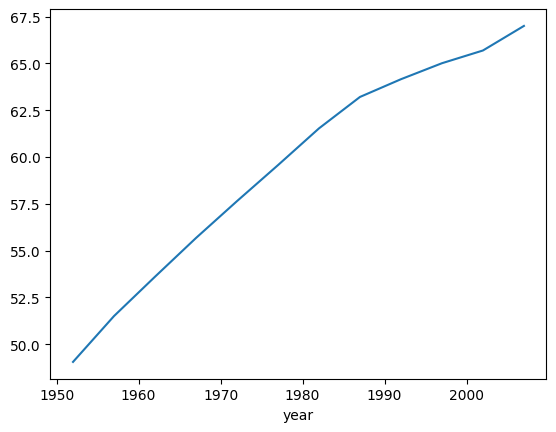

In [ ]:
df.groupby('year')['lifeExp'].mean().plot()
plt.show()

Now let's go a bit further. Say we want to find the life expentancy data grouped by year and by country.

In [ ]:
df.groupby(['year', 'country'])[['pop', 'lifeExp']].mean()

pop  lifeExp
year country                                
1952 Afghanistan          8425333.0   28.801
     Albania              1282697.0   55.230
     Algeria              9279525.0   43.077
     Angola               4232095.0   30.015
     Argentina           17876956.0   62.485
...                             ...      ...
2007 Vietnam             85262356.0   74.249
     West Bank and Gaza   4018332.0   73.422
     Yemen, Rep.         22211743.0   62.698
     Zambia              11746035.0   42.384
     Zimbabwe            12311143.0   43.487

[1704 rows x 2 columns]

This is a lot of information to take in and Pandas only presents a snapshot of the 1704 rows. To make it easier for ourselves, we can ask Pandas to limit the information to a list of years, say 1972, 1982 qne 1987. We use Panda's *loc()* method to filter rows based on their label.

In [ ]:
df.groupby(['year', 'country'])[['pop', 'lifeExp']].mean().loc[[1972, 1982, 1987]]

pop  lifeExp
year country                                
1972 Afghanistan         13079460.0   36.088
     Albania              2263554.0   67.690
     Algeria             14760787.0   54.518
     Angola               5894858.0   37.928
     Argentina           24779799.0   67.065
...                             ...      ...
1987 Vietnam             62826491.0   62.820
     West Bank and Gaza   1691210.0   67.046
     Yemen, Rep.         11219340.0   52.922
     Zambia               7272406.0   50.821
     Zimbabwe             9216418.0   62.351

[426 rows x 2 columns]

It's worth discussing a few fine points about Panda's concept of a *data row*. Before we grouped the data by year, a row was a unit of information in the gapminder.tsv data file. That is, the original Pandas *data frame* was made up of all 1704 rows. However, now that we applied the *groupby()* method, Pandas organized the data such that a row bundles information by year. In this new, derived data frame, a row is now indexed by the year: 1972, 1982 and so on. Therefore when we apply the *loc()* method, we're filtering these subset of grouped-by rows, not the original rows in the data file.

Applying the *loc()* method a number of times, we can futher refine the rows of information we extract for a particular year.

In [ ]:
df.groupby(['year', 'country'])[['pop', 'lifeExp']].mean().loc[1972].loc[['Albania', 'Brazil', 'Vietnam']]

,pop,lifeExp
country,,
Albania,2263554.0,67.690
Brazil,100840058.0,59.504
Vietnam,44655014.0,50.254
